# **Estadisticas y Graficas**

## **Diagrama de barras**

Puedes crear un diagrama de barras para visualizar el puntaje de felicidad de cada país. La variable "Happiness Score" es la que te permitiría hacer esta gráfica.

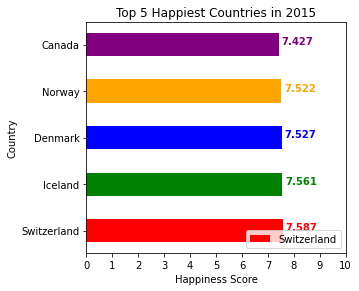

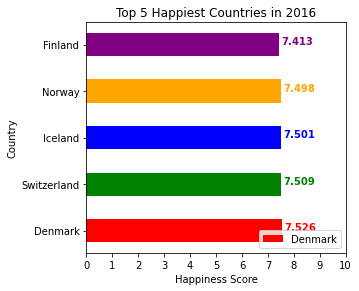

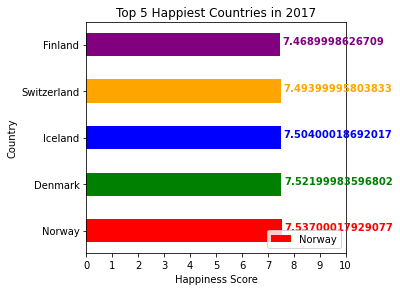

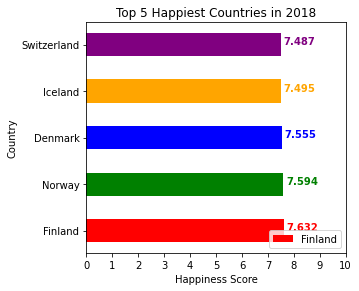

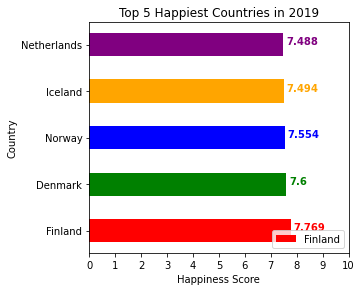

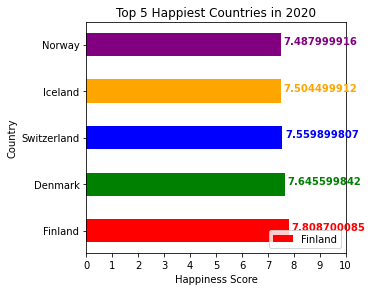

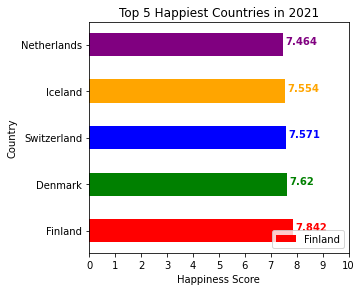

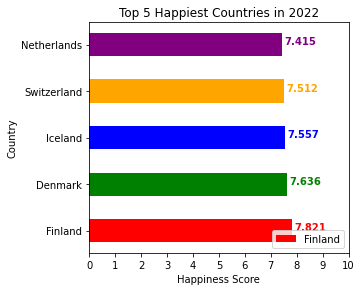

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('./data/datos_modificado.csv')

# Crear una lista de años únicos en los datos
years = data['Year'].unique()

# Definir una lista de colores para las barras
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Para cada año, crear una gráfica de barras horizontales con los 5 países con el mejor índice de felicidad
for year in years:
    # Seleccionar los datos correspondientes al año actual
    year_data = data[data['Year'] == year]
    
    # Ordenar los datos por índice de felicidad descendente y seleccionar los primeros 5 países
    top_countries = year_data.sort_values('Happiness Score', ascending=False).head(5)
    
    # Crear la gráfica de barras
    plt.barh(top_countries['Country'], top_countries['Happiness Score'], height=0.5, color=colors)
    
    # Añadir etiquetas con los valores de las barras
    for i, v in enumerate(top_countries['Happiness Score']):
        plt.text(v + 0.1, i, str(v), color=colors[i], fontweight='bold')
    
    # Configurar el título y los ejes de la gráfica
    plt.title(f'Top 5 Happiest Countries in {year}')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    
    # Especificar el rango y los incrementos del eje x
    plt.xlim(0, 10)
    plt.xticks([i for i in range(11)])
    
    # Ajustar el espaciado entre las barras y los bordes de la gráfica
    plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
    
    # Añadir leyenda
    plt.legend(top_countries['Country'], loc='lower right')
    
    # Mostrar la gráfica
    plt.show()

## **Gráfico de líneas**

Gráfico de línea de la evolución de la puntuación de felicidad de un país a lo largo del tiempo.

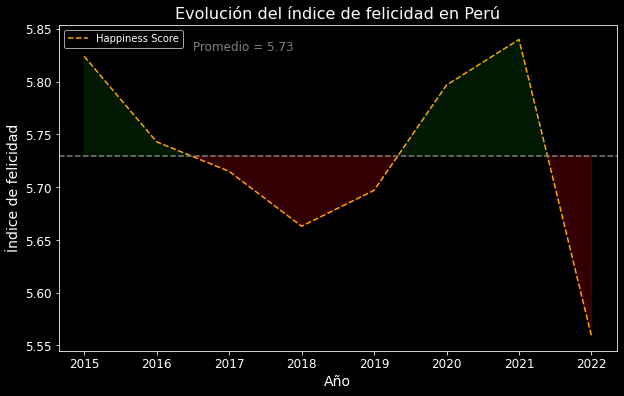

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('./data/datos_modificado.csv')

# Seleccionar los datos correspondientes al país de interés
country_data = data[data['Country'] == 'Peru']

# Configurar el estilo de línea y el color de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Happiness Score'], color='orange', linestyle='--')

# Configurar la leyenda
plt.legend(['Happiness Score'])

# Configurar el título y los ejes de la gráfica
plt.title('Evolución del índice de felicidad en Perú', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Índice de felicidad', fontsize=14)

# Configurar el fondo de la gráfica
plt.style.use('dark_background')

# Cambiar el tamaño de la gráfica y los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Agregar una línea horizontal para el promedio de felicidad
mean_score = country_data['Happiness Score'].mean()
plt.axhline(mean_score, color='gray', linestyle='--')
plt.text(2016.5, mean_score+0.1, f"Promedio = {mean_score:.2f}", color='gray', fontsize=12)

# Agregar sombreado debajo de la línea de felicidad
ax.fill_between(country_data['Year'], country_data['Happiness Score'], mean_score, where=country_data['Happiness Score']>=mean_score, interpolate=True, color='green', alpha=0.2)
ax.fill_between(country_data['Year'], country_data['Happiness Score'], mean_score, where=country_data['Happiness Score']<mean_score, interpolate=True, color='red', alpha=0.2)

# Mostrar la gráfica
plt.show()


## **Gráfico de dispersión**

Gráfico de dispersión de la relación entre la puntuación de felicidad y el PIB per cápita.

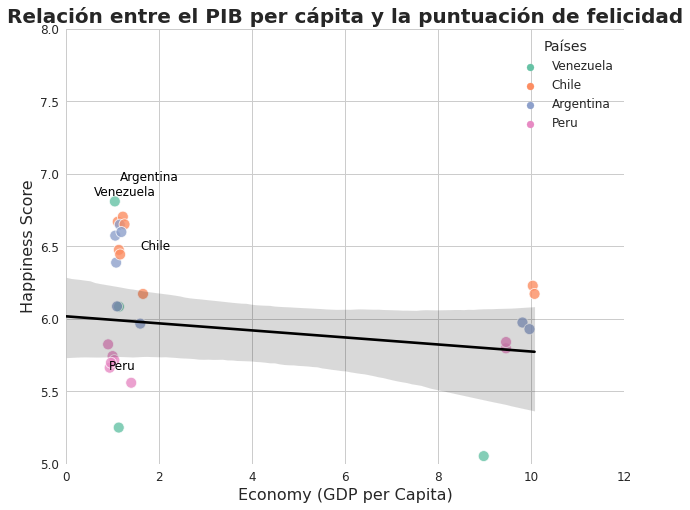

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV
data = pd.read_csv('./data/datos_modificado.csv')

# Filtrar los países de interés
countries = ['Peru', 'Chile', 'Argentina', 'Venezuela']
data = data[data['Country'].isin(countries)]

# Seleccionar las variables de interés
data = data[['Happiness Score', 'Economy (GDP per Capita)', 'Country']]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', hue='Country', data=data,
                alpha=0.8, s=120)

# Configurar los ejes y el título de la gráfica
plt.title('Relación entre el PIB per cápita y la puntuación de felicidad', fontsize=20, fontweight='bold')
plt.xlabel('PIB per cápita (USD)', fontsize=16)
plt.ylabel('Puntuación de felicidad', fontsize=16)

# Configurar los márgenes y el rango de los ejes
plt.xlim([0, 12])
plt.ylim([5, 8])
plt.tick_params(labelsize=12)

# Agregar una línea de regresión
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=data, scatter=False, color='black')

# Agregar leyenda y personalizarla
plt.legend(loc='upper left', fontsize=12)
legend = plt.legend(title='Países', fontsize=12)
legend.get_title().set_fontsize(14)
for text in legend.texts:
    text.set_fontsize(12)

# Agregar etiquetas de texto a puntos específicos
plt.text(1.15, 6.95, 'Argentina', fontsize=12, color='black')
plt.text(1.6, 6.48, 'Chile', fontsize=12, color='black')
plt.text(0.92, 5.65, 'Peru', fontsize=12, color='black')
plt.text(0.6, 6.85, 'Venezuela', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


## **Mapa de calor**

Este gráfico se puede utilizar para mostrar la distribución geográfica del índice de felicidad. Cada país se colorea según su valor de índice de felicidad, y los colores se pueden graduar para reflejar diferentes rangos de valores.

In [8]:
import plotly.express as px
import pandas as pd

# cargar el conjunto de datos
df = pd.read_csv('./data/datos_modificado.csv')

# filtrar el dataframe para un año específico
year = 2022
df_year = df[df['Year'] == year]

# crear el mapa de calor
fig = px.choropleth(df_year, locations='Country', locationmode='country names', color='Happiness Score',
                    range_color=[0, 10], color_continuous_scale='RdYlGn', 
                    title=f'Índice Mundial de la Felicidad ({year})')

# personalizar el mapa de calor
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='miller',
        bgcolor='rgba(0,0,0,0)'
    ),
    margin=dict(l=20, r=20, t=80, b=20),
    height=600,
    width=1000,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    coloraxis_colorbar=dict(
        title='Puntaje de Felicidad',
        thicknessmode='pixels', thickness=30,
        lenmode='pixels', len=300,
        yanchor='middle', y=0.5,
        tickfont=dict(size=16)
    ),
    annotations=[
        dict(
            x=0.55,
            y=-0.1,
            xref='paper',
            yref='paper',
            showarrow=False,
            text='Fuente: Informe Mundial de la Felicidad',
            font=dict(size=16)
        )
    ]
)

fig.update_xaxes(
    title_text="País",
    title_font=dict(size=20, family='Arial'),
    tickfont=dict(size=16)
)

fig.update_yaxes(
    title_text="Índice de Felicidad",
    title_font=dict(size=20, family='Arial'),
    tickfont=dict(size=16)
)

# mostrar el gráfico
fig.show()

![Mapa de calor!](./img/newplot.png "Mapa de calor")